In [1]:
import requests
from PIL import Image

# import libraries
import numpy as np

# convolution
from scipy.signal import convolve2d

import torchvision.transforms as T

# to read an image from a url
from imageio import imread

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\DELL\AppData\Local\Temp\ipykernel_356\1618506462.py:17: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


Text(0.5, 1.0, 'Image')

Text(0.5, 1.0, 'Convolution kernel')

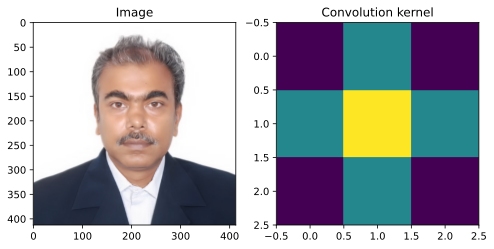

In [76]:
# image
url = 'https://raw.githubusercontent.com/rkumar-bengaluru/data-science/main/17-Deep-Learning/12-Convolution/1530340798737.jpg'
img = Image.open(requests.get(url, stream = True).raw)

imgN = 20
image = np.random.randn(imgN,imgN)

# convolution kernel
kernelN = 3
Y,X = np.meshgrid(np.linspace(-1,1,kernelN),np.linspace(-1,1,kernelN))
kernel = np.exp( -(X**2+Y**2)/7 )


# let's see what they look like
fig,ax = plt.subplots(1,2,figsize=(8,6))
ax[0].imshow(img)
ax[0].set_title('Image')

ax[1].imshow(kernel)
ax[1].set_title('Convolution kernel')

plt.show()

In [73]:
# now for the convolution
convoutput = np.zeros((imgN,imgN))
halfKr = kernelN//2

for rowi in range(halfKr,imgN-halfKr):
  for coli in range(halfKr,imgN-halfKr):

    # cut out a piece of the image
    pieceOfImg = image[rowi-halfKr:rowi+halfKr+1,:]      # get the rows
    pieceOfImg = pieceOfImg[:,coli-halfKr:coli+halfKr+1] # extract the columns

    # dot product: element-wise multiply and sum (and flip the kernel for "real convolution")
    dotprod = np.sum( pieceOfImg*kernel[::-1,::-1] )

    # store the result for this pixel
    convoutput[rowi,coli] = dotprod

In [74]:
# using scipy
convoutput2 = convolve2d(image,kernel,mode='valid')

Text(0.5, 1.0, 'Image')

Text(0.5, 1.0, 'Convolution kernel')

Text(0.5, 1.0, 'Manual convolution')

Text(0.5, 1.0, "Scipy's convolution")

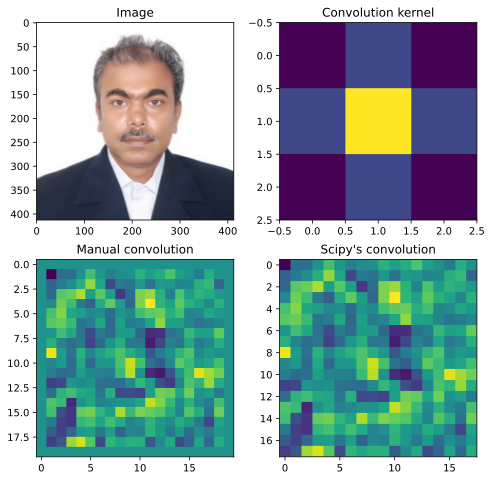

In [75]:
fig,ax = plt.subplots(2,2,figsize=(8,8))

ax[0,0].imshow(img)
ax[0,0].set_title('Image')

ax[0,1].imshow(kernel)
ax[0,1].set_title('Convolution kernel')

ax[1,0].imshow(convoutput)
ax[1,0].set_title('Manual convolution')

ax[1,1].imshow(convoutput2)
ax[1,1].set_title("Scipy's convolution")

plt.show()

In [6]:
# hand-craft two convolution kernels

# vertical kernel
VK = np.array([ [1,0,-1],
                [1,0,-1],
                [1,0,-1] ])

# horizontal kernel
HK = np.array([ [ 1, 1, 1],
                [ 0, 0, 0],
                [-1,-1,-1] ])

In [7]:
# transform image to 2D for convenience (not necessary for convolution!)
# read a pic from the web
bathtub = imread(url)
bathtub = np.mean(bathtub,axis=2)
bathtub = bathtub/np.max(bathtub)

# check the size
print(bathtub.shape)


(413, 413)


C:\Users\DELL\AppData\Local\Temp\ipykernel_356\2736434914.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  bathtub = imread(url)


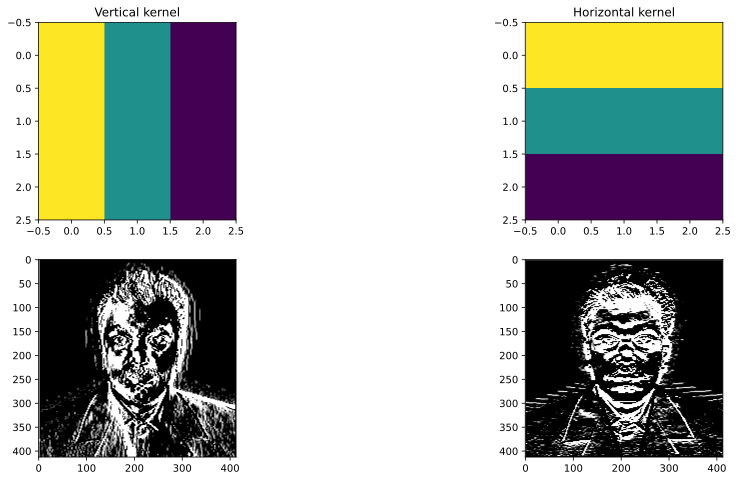

In [8]:
fig,ax = plt.subplots(2,2,figsize=(16,8))

ax[0,0].imshow(VK)
ax[0,0].set_title('Vertical kernel')

ax[0,1].imshow(HK)
ax[0,1].set_title('Horizontal kernel')


# run convolution and show the result
convres = convolve2d(bathtub,VK,mode='same')
ax[1,0].imshow(convres,cmap='gray',vmin=0,vmax=.01)

convres = convolve2d(bathtub,HK,mode='same')
ax[1,1].imshow(convres,cmap='gray',vmin=0,vmax=.01)

plt.show()

Pytorch

In [9]:
# first, translate everything into a tensor
import torch
import torch.nn.functional as F

VK_t = torch.tensor(VK).view(1,1,3,3).double()
HK_t = torch.tensor(HK).view(1,1,3,3).double()
bathtub_t = torch.tensor(bathtub).view(1,1,bathtub.shape[0],bathtub.shape[1])

print(VK_t.shape)
print(bathtub_t.shape)

torch.Size([1, 1, 3, 3])
torch.Size([1, 1, 413, 413])


In [10]:
C = F.conv2d(bathtub_t,VK_t)
print(C.shape)

torch.Size([1, 1, 411, 411])


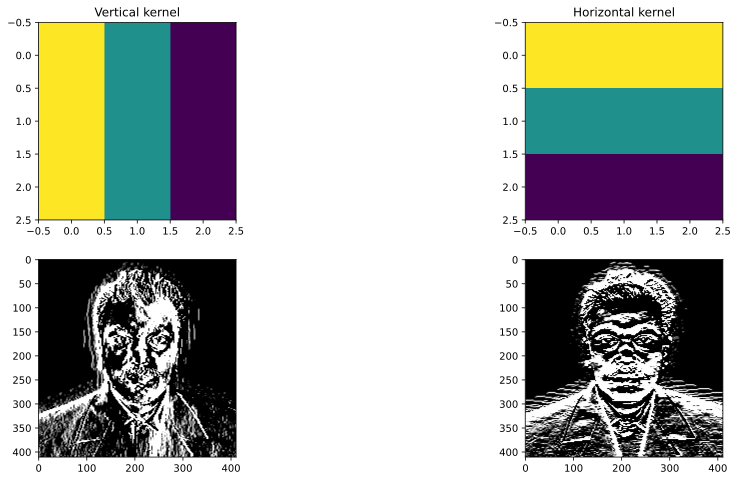

In [11]:
fig,ax = plt.subplots(2,2,figsize=(16,8))

ax[0,0].imshow(VK)
ax[0,0].set_title('Vertical kernel')

ax[0,1].imshow(HK)
ax[0,1].set_title('Horizontal kernel')


# run convolution and show the result
convres = F.conv2d(bathtub_t,VK_t)
img = torch.squeeze(convres.detach())
ax[1,0].imshow(img,cmap='gray',vmin=0,vmax=.01)

convres = F.conv2d(bathtub_t,HK_t)
img = torch.squeeze(convres.detach())
ax[1,1].imshow(img,cmap='gray',vmin=0,vmax=.01)

plt.show()

In [60]:
url = 'https://raw.githubusercontent.com/rkumar-bengaluru/data-science/main/17-Deep-Learning/12-Convolution/8x8.jpg'
img = Image.open(requests.get(url, stream = True).raw)
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [61]:
print(img.format)
print(img.size)
print(img.mode)

JPEG
(8, 8)
RGB


In [62]:
numpydata = np.array(img)
 
# <class 'numpy.ndarray'>
print(type(numpydata))
 
#  shape
print(numpydata.shape)

<class 'numpy.ndarray'>
(8, 8, 3)


In [63]:
numpydata

array([[[254, 255, 255],
        [255, 254, 252],
        [255, 252, 253],
        [231, 219, 219],
        [229, 215, 215],
        [254, 246, 244],
        [247, 247, 245],
        [251, 255, 255]],

       [[252, 253, 248],
        [255, 254, 251],
        [197, 186, 184],
        [135, 120, 117],
        [145, 127, 125],
        [141, 130, 126],
        [255, 255, 250],
        [254, 255, 251]],

       [[255, 254, 248],
        [255, 253, 248],
        [185, 167, 163],
        [190, 169, 164],
        [183, 162, 157],
        [129, 112, 105],
        [255, 251, 244],
        [255, 255, 248]],

       [[255, 252, 245],
        [255, 249, 243],
        [221, 202, 196],
        [189, 164, 159],
        [188, 163, 158],
        [174, 155, 148],
        [255, 252, 244],
        [255, 252, 243]],

       [[255, 250, 244],
        [255, 252, 248],
        [233, 215, 211],
        [189, 165, 163],
        [175, 151, 147],
        [211, 192, 186],
        [255, 252, 246],
        [255, 252

In [64]:
bathtub = imread(url)
print(bathtub.shape)

C:\Users\DELL\AppData\Local\Temp\ipykernel_356\2687100089.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  bathtub = imread(url)


(8, 8, 3)


In [65]:
# transform image to 2D for convenience (not necessary for convolution!)
bathtub = np.mean(bathtub,axis=2)
bathtub = bathtub/np.max(bathtub)

# check the size again
print(bathtub.shape)

(8, 8)


In [66]:
bathtub

array([[1.        , 0.9960733 , 0.9947644 , 0.87565445, 0.86256545,
        0.97382199, 0.96727749, 0.9960733 ],
       [0.98560209, 0.9947644 , 0.7421466 , 0.48691099, 0.51963351,
        0.51963351, 0.9947644 , 0.9947644 ],
       [0.9908377 , 0.9895288 , 0.67408377, 0.68455497, 0.65706806,
        0.45287958, 0.98167539, 0.9921466 ],
       [0.98429319, 0.97774869, 0.81020942, 0.67015707, 0.66623037,
        0.62434555, 0.98298429, 0.98167539],
       [0.98036649, 0.9882199 , 0.86256545, 0.67670157, 0.61910995,
        0.77094241, 0.98560209, 0.98560209],
       [0.9973822 , 0.79973822, 0.45418848, 0.64136126, 0.59293194,
        0.48298429, 0.66361257, 0.90314136],
       [0.34162304, 0.21989529, 0.19502618, 0.65575916, 0.82984293,
        0.19371728, 0.13874346, 0.17408377],
       [0.18717277, 0.17539267, 0.19109948, 0.5013089 , 0.7447644 ,
        0.20942408, 0.16099476, 0.14790576]])

In [67]:

print(np.matrix(bathtub))

[[1.         0.9960733  0.9947644  0.87565445 0.86256545 0.97382199
  0.96727749 0.9960733 ]
 [0.98560209 0.9947644  0.7421466  0.48691099 0.51963351 0.51963351
  0.9947644  0.9947644 ]
 [0.9908377  0.9895288  0.67408377 0.68455497 0.65706806 0.45287958
  0.98167539 0.9921466 ]
 [0.98429319 0.97774869 0.81020942 0.67015707 0.66623037 0.62434555
  0.98298429 0.98167539]
 [0.98036649 0.9882199  0.86256545 0.67670157 0.61910995 0.77094241
  0.98560209 0.98560209]
 [0.9973822  0.79973822 0.45418848 0.64136126 0.59293194 0.48298429
  0.66361257 0.90314136]
 [0.34162304 0.21989529 0.19502618 0.65575916 0.82984293 0.19371728
  0.13874346 0.17408377]
 [0.18717277 0.17539267 0.19109948 0.5013089  0.7447644  0.20942408
  0.16099476 0.14790576]]


In [69]:
x = np.array([[1, 1, 1], [-1, -1, -1], [0, 0, 0]], np.int32)


In [70]:
print(np.matrix(x))

[[ 1  1  1]
 [-1 -1 -1]
 [ 0  0  0]]


In [71]:
np.dot(bathtub, x)

ValueError: shapes (8,8) and (3,3) not aligned: 8 (dim 1) != 3 (dim 0)